<a href="https://colab.research.google.com/github/Nitin22122/DL-Lab/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Step 2: Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Step 3: Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 5: Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Step 6: Train model
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)
# Step 7: Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8554 - loss: 0.5169 - val_accuracy: 0.9545 - val_loss: 0.1649
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9466 - loss: 0.1856 - val_accuracy: 0.9605 - val_loss: 0.1347
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1307 - val_accuracy: 0.9695 - val_loss: 0.1067
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9713 - loss: 0.0985 - val_accuracy: 0.9743 - val_loss: 0.0957
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9777 - loss: 0.0781 - val_accuracy: 0.9742 - val_loss: 0.0900
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0664 - val_accuracy: 0.9743 - val_loss: 0.0872
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0532 - val_accuracy: 0.9780 - val_loss: 0.0805
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9881 - loss: 0.0457 - 

In [ ]:
# Step 8: Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Step 9: Classification Report (IMAGE-LIKE OUTPUT)
print("\nAccuracy:", accuracy_score(y_test, y_pred_classes))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))


Accuracy: 0.9735

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



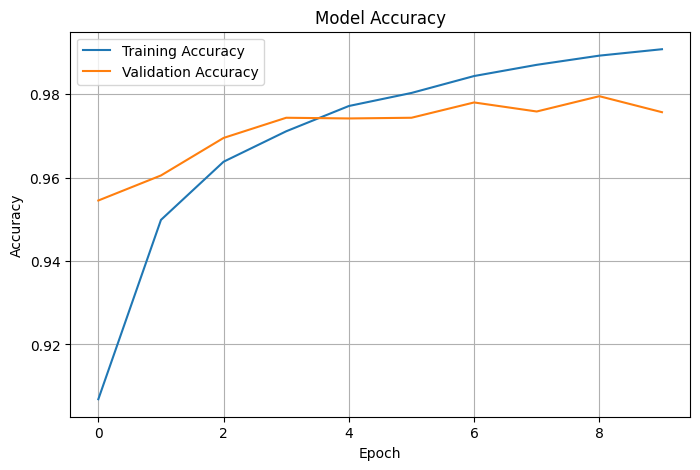

In [ ]:
# Step 10: Accuracy Graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()

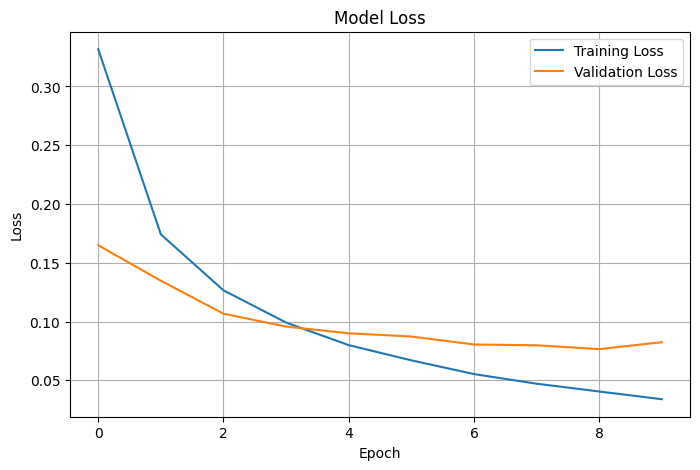

In [ ]:
# Step 11: Loss Graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.grid(True)
plt.show()